In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

import warnings
warnings.filterwarnings(action = 'ignore')

2.Load the dataset.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False).head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


 3.Perform Below Visualizations.

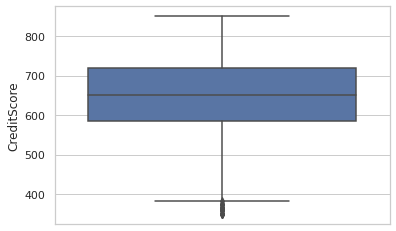

In [ ]:
#univariate analysis
sns.set(style="whitegrid")
sns.boxplot(y=data['CreditScore'])

502
159660.8


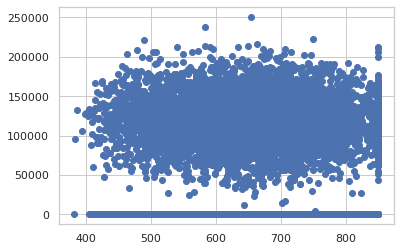

In [ ]:
#bivariate analysis
credit_score = df['CreditScore']
balance = df['Balance']
credit_score.dropna()
balance.dropna()
print(credit_score[2])
print(balance[2])
plt.scatter(credit_score , balance)
plt.show()

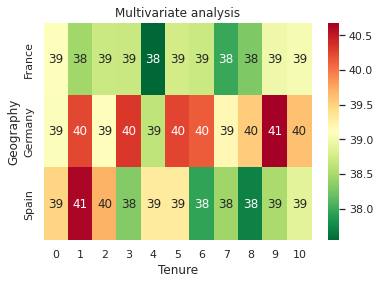

In [ ]:
#multivariate
result = pd.pivot_table(data=data, index='Geography', columns='Tenure',values='Age')
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('Multivariate analysis')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4.Perform descriptive statistics on the dataset.

In [ ]:
data['Age'].mode()

0    37
dtype: int64

In [ ]:
data["Age"].mean()

38.9218

In [ ]:
m=round(data["Age"].mean())

In [ ]:
data["Age"].median()

37.0

In [ ]:
s=round(data['Age'].std())
print(s)

10


5.Handle missing values

In [ ]:
#check missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

6.Find the outliers and replace the outliers

In [ ]:
CreditScores = data['CreditScore']
CreditScores

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

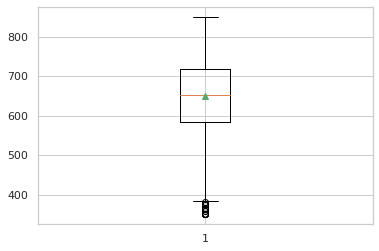

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data['CreditScore'],showmeans = True)
plt.show()

In [ ]:
df = data[data['CreditScore'] >= 378]
for i in data['CreditScore']:
    if(i<378):
        print(i)
print(data['CreditScore'])

376
376
363
359
350
350
358
351
365
367
350
350
373
350
0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64


In [ ]:
b = data['Balance']
b

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

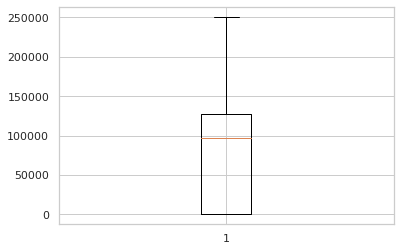

In [ ]:
plt.boxplot(b)
plt.show()

In [ ]:
e= df['EstimatedSalary']
e

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 9986, dtype: float64

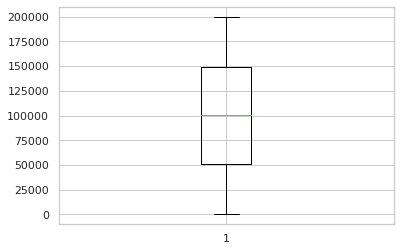

In [ ]:
plt.boxplot(e) 
plt.show()

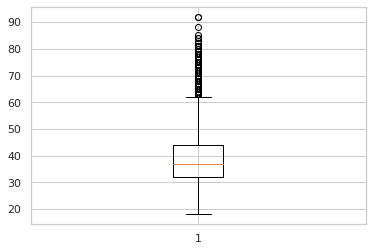

In [ ]:
a = data['Age']
plt.boxplot(a)
plt.show()

In [ ]:
ageOutliers =  np.where(df['Age'] > 60)
ageOutliers

(array([  41,   43,   57,   84,  103,  157,  180,  229,  233,  242,  251,
         275,  309,  363,  370,  384,  386,  398,  415,  483,  537,  558,
         560,  566,  601,  611,  616,  629,  657,  677,  695,  735,  765,
         768,  806,  810,  822,  858,  883,  887,  920,  927,  946,  950,
         955,  961,  967,  995, 1007, 1037, 1038, 1053, 1112, 1116, 1190,
        1202, 1231, 1232, 1243, 1249, 1275, 1282, 1325, 1339, 1384, 1403,
        1406, 1429, 1435, 1453, 1515, 1539, 1584, 1603, 1610, 1637, 1785,
        1805, 1852, 1860, 1895, 1898, 1901, 1927, 1974, 1989, 1995, 2005,
        2032, 2046, 2071, 2087, 2096, 2101, 2147, 2152, 2157, 2237, 2254,
        2267, 2291, 2294, 2426, 2431, 2451, 2452, 2511, 2512, 2525, 2533,
        2545, 2590, 2606, 2650, 2661, 2704, 2708, 2751, 2763, 2768, 2769,
        2772, 2782, 2846, 2868, 2892, 2899, 2916, 2917, 2999, 3024, 3045,
        3101, 3133, 3157, 3183, 3194, 3220, 3296, 3299, 3302, 3305, 3308,
        3337, 3357, 3359, 3369, 3373, 

In [ ]:
da = data[data['Age'] <=60 ]
da

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


7.Check for Categorical columns and perform encoding.

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from pandas.api.types import is_string_dtype
continuous=[]
categorical=[]
for data1 in data:
    if is_string_dtype(data[data1]):
        categorical.append(data1)
    else:
        continuous.append(data1)
categorical

['Surname', 'Geography', 'Gender']

8.Split the data into dependent and independent variables.

In [ ]:
x = data.iloc[:, 0:1].values
y = data.iloc[:, 1]
print(x)
print(y)

[[    1]
 [    2]
 [    3]
 ...
 [ 9998]
 [ 9999]
 [10000]]
0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64


9.Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)
X_test = sc.transform(x)

10.Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data,y,test_size=0.2)

In [ ]:
print(X_train)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9124       9125    15753639     Gibson          608    France    Male   37   
7117       7118    15765257       Meng          564     Spain    Male   31   
4955       4956    15581525     Walker          775   Germany    Male   33   
5016       5017    15687903    Okonkwo          501    France  Female   29   
139         140    15640905      Vasin          579     Spain  Female   35   
...         ...         ...        ...          ...       ...     ...  ...   
1925       1926    15757931       Fang          804    France    Male   24   
4909       4910    15787258       Ross          596     Spain  Female   29   
9083       9084    15711396  Henderson          427     Spain    Male   40   
6024       6025    15568834    Howells          698     Spain    Male   27   
2181       2182    15738605    Fischer          634   Germany  Female   46   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
print(X_test)

      RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
5607       5608    15771728       Mackenzie          641   Germany    Male   
2309       2310    15621210          Angelo          599   Germany    Male   
5962       5963    15571193        Morrison          579   Germany    Male   
2728       2729    15770420          Dillon          749   Germany    Male   
5800       5801    15610379  Barclay-Harvey          599    France    Male   
...         ...         ...             ...          ...       ...     ...   
7983       7984    15628272           Singh          774    France  Female   
3720       3721    15788775           Milne          473   Germany    Male   
802         803    15681554           Alley          614   Germany  Female   
4487       4488    15614365        Lombardi          696   Germany    Male   
8638       8639    15587573     Castiglione          626   Germany    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiv

In [ ]:
print(y_train)

9124    15753639
7117    15765257
4955    15581525
5016    15687903
139     15640905
          ...   
1925    15757931
4909    15787258
9083    15711396
6024    15568834
2181    15738605
Name: CustomerId, Length: 8000, dtype: int64


In [ ]:
print(y_test)

5607    15771728
2309    15621210
5962    15571193
2728    15770420
5800    15610379
          ...   
7983    15628272
3720    15788775
802     15681554
4487    15614365
8638    15587573
Name: CustomerId, Length: 2000, dtype: int64
